In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

<h1>Regression Models Demos</h1>

In [3]:
def real_function():
    length = 20
    x = np.linspace(-3, 5, length)
    y = 2 * x + 3
    
    y_noise = np.random.normal(loc = 0, scale = 2, size = length)
    y += y_noise
    
    return x, y

In [4]:
x, y = real_function()

In [5]:
x, y

(array([-3.        , -2.57894737, -2.15789474, -1.73684211, -1.31578947,
        -0.89473684, -0.47368421, -0.05263158,  0.36842105,  0.78947368,
         1.21052632,  1.63157895,  2.05263158,  2.47368421,  2.89473684,
         3.31578947,  3.73684211,  4.15789474,  4.57894737,  5.        ]),
 array([-1.47469166, -2.55561341,  0.23976386,  2.37749499,  0.30608398,
         3.21697388,  1.16443357,  3.33991558,  7.31889565,  3.2527115 ,
         4.89115382,  4.07795414,  8.63606474,  9.55568413,  6.27644889,
        10.89898976,  9.02001441, 10.59773389, 12.26709252, 12.52861603]))

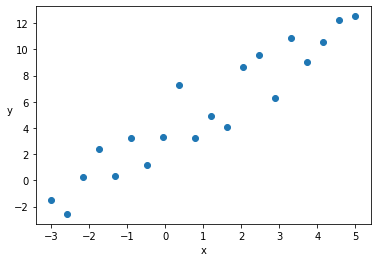

In [6]:
plt.scatter(x, y)

plt.xlabel('x')
plt.ylabel('y', rotation=0)

plt.show()

In [7]:
y_predicted = 3 * x + 0

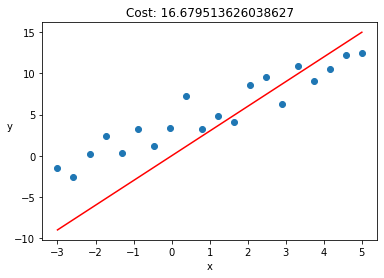

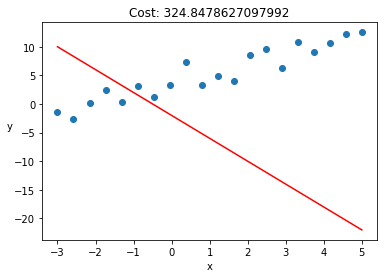

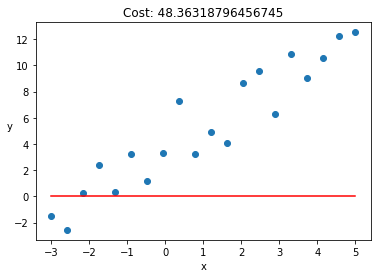

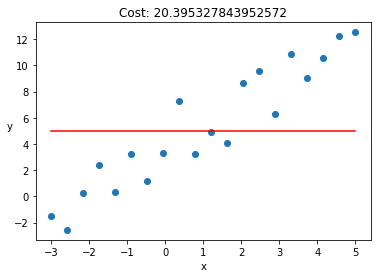

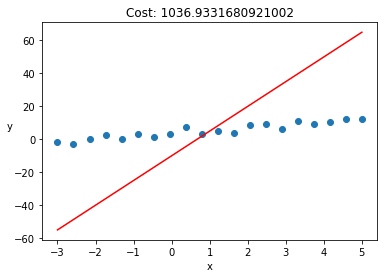

In [8]:
for y_predicted in [3 * x, -4 * x - 2, np.zeros(len(x)), np.zeros(len(x)) + 5, 15 * x - 10]:
    plt.scatter(x, y)

    plt.plot(x, y_predicted, c='r')

    plt.xlabel('x')
    plt.ylabel('y', rotation=0)
    
    mse = np.mean((y_predicted - y) ** 2)
    plt.title(f'Cost: {mse}')

    plt.show()

In [9]:
def perform_gradient_descent(x, y, a, b, learning_rate):
    a_gradient = -2 / len(x) * np.sum(x * (y - (a * x + b)))
    b_gradient = -2 / len(y) * np.sum(y - (a * x + b))
    new_a = a - a_gradient * learning_rate
    new_b = b - b_gradient * learning_rate
    return (new_a, new_b)

In [10]:
perform_gradient_descent(x, y, 3, 0, 0.001)

(2.9898770142531936, 0.004593572024122979)

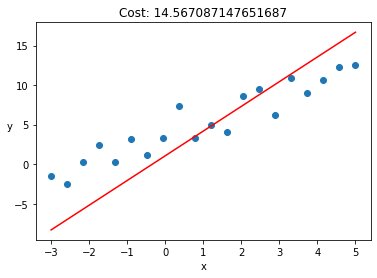

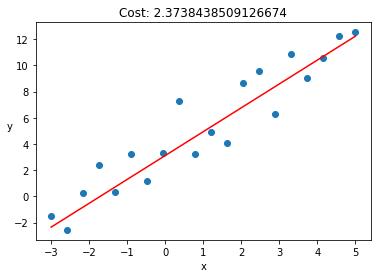

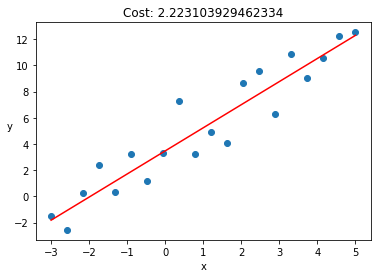

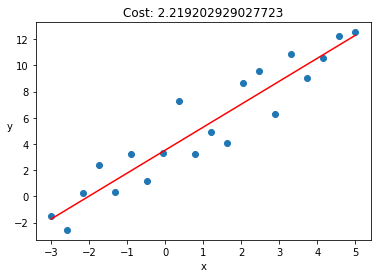

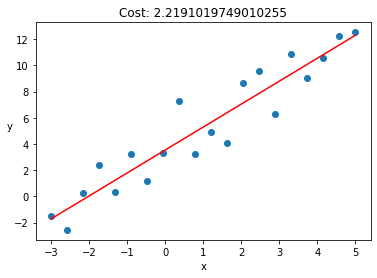

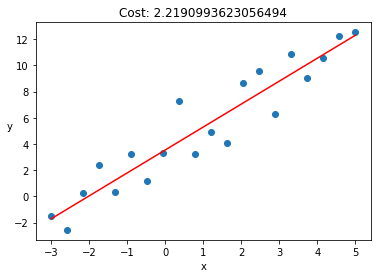

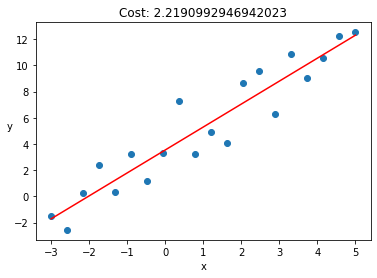

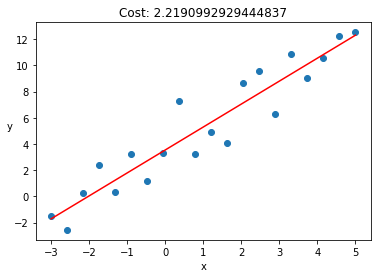

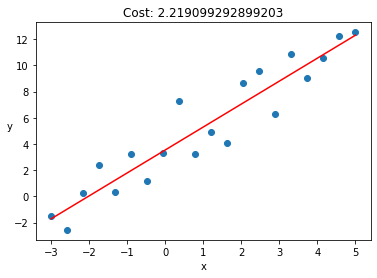

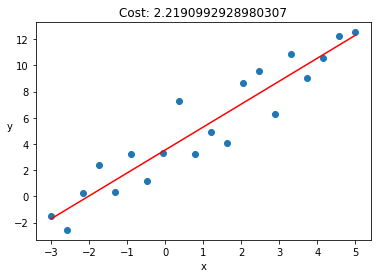

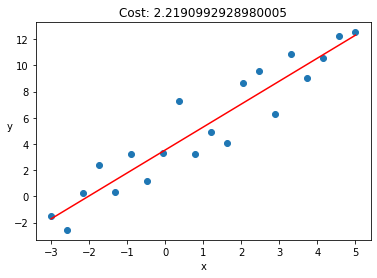

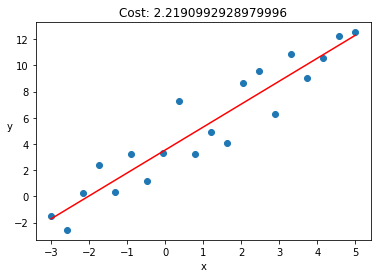

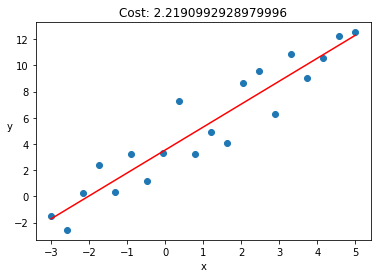

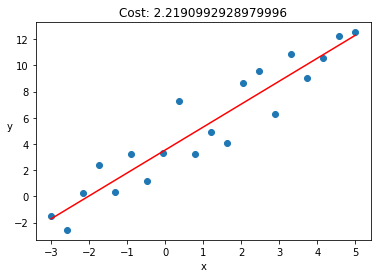

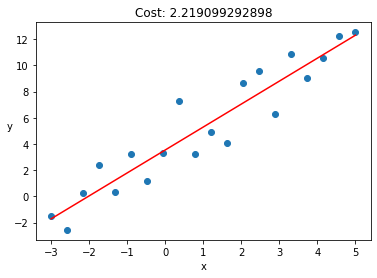

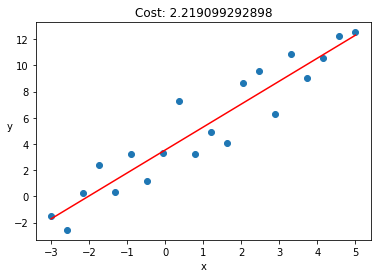

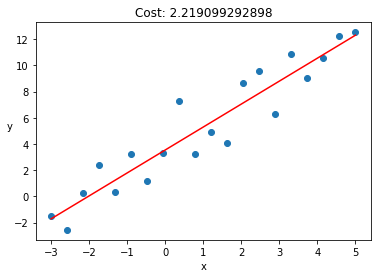

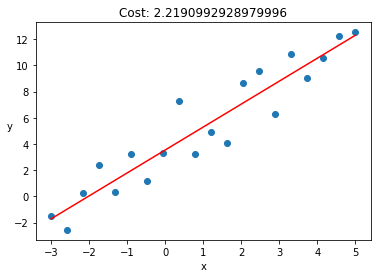

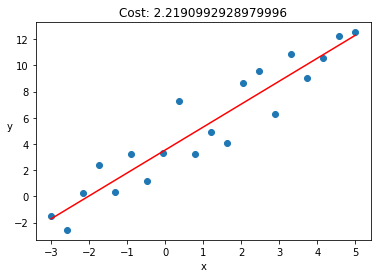

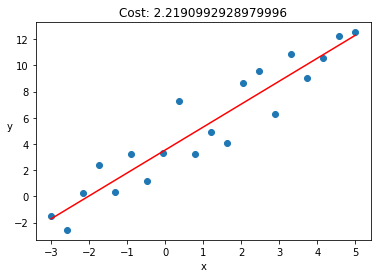

1.7517205462158307 3.5450654658456573


In [11]:
a = 0
b = 0 

learning_rate = 0.1

for i in range(200):
    a, b = perform_gradient_descent(x, y, a, b, learning_rate)
    if i % 10 == 0:
        plt.scatter(x, y)
    
        y_predicted = a * x + b

        plt.plot(x, y_predicted, c='r')

        plt.xlabel('x')
        plt.ylabel('y', rotation=0)

        mse = np.mean((y_predicted - y) ** 2)
        plt.title(f'Cost: {mse}')

        plt.show()
print(a, b)

In [12]:
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)
# second variant - x.reshape(len(x), 1)

LinearRegression()

In [13]:
model.coef_, model.intercept_

(array([1.75172055]), 3.54506546584566)

In [14]:
print(load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [15]:
data = load_boston().data
targets = load_boston().target

In [16]:
data.shape

(506, 13)

In [17]:
targets.shape

(506,)

In [18]:
boston_model = LinearRegression()
boston_model.fit(data, targets)

LinearRegression()

In [19]:
boston_model.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [20]:
predicted_targets = boston_model.predict(data)

In [21]:
np.sqrt(mean_squared_error(targets, predicted_targets))

4.679191295697281

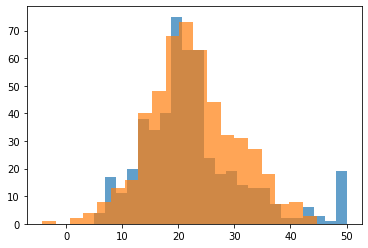

In [22]:
plt.hist(targets, bins='fd', alpha = 0.7)
plt.hist(predicted_targets, bins='fd', alpha = 0.7)
plt.show()

In [23]:
boston_model.score(data, targets) # preview for next coure (Machine Learning)

0.7406426641094095

In [24]:
abs_differences = np.abs(predicted_targets - targets)

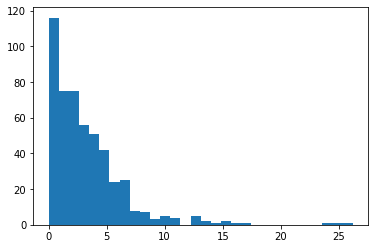

In [25]:
plt.hist(abs_differences, bins='fd')
plt.show()

In [26]:
rel_differences = np.abs(predicted_targets - targets) / targets

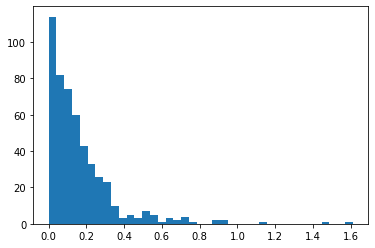

In [27]:
plt.hist(rel_differences, bins='fd')
plt.show()

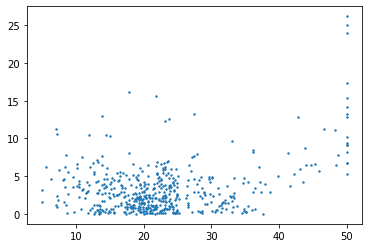

In [28]:
plt.scatter(targets, abs_differences, s = 2)
plt.show()